In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(8,8))

In [149]:
#Use the following function when reading an image through OpenCV and displaying through plt.
def showfig(image, ucmap):
    #There is a difference in pixel ordering in OpenCV and Matplotlib.
    #OpenCV follows BGR order, while matplotlib follows RGB order.
    if len(image.shape)==3 :
        b,g,r = cv2.split(image)       # get b,g,r
        #image = cv2.merge([r,g,b])     # switch it to rgb
    imgplot=plt.imshow(image, ucmap)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)

In [171]:
# import images and resize into 250x250
import glob
img_rows, img_cols = 224, 224
import cv2
N = 1000
data = np.empty((N, img_rows, img_cols, 3), dtype=np.uint8)#../hackathon/*  ../hackathon/baza_slika/*//*.*
img_names = []   #../hackathon/car_parking_dataset/*.jpg  
for ix, filename in enumerate(glob.glob("../hackathon/car_parking_dataset/*.*")): #/Users/Stav/Downloads/cars_markus_old/*.jpg")): #assuming gif
    try:
        img_names.append(filename)
        img = cv2.imread(filename,flags = 1)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # opencv reads images in bgr lets convert back
        img = cv2.resize(img, (img_rows,img_cols))
        #print (img.shape)
        data[ix, ...] = img#.transpose(2, 0, 1)
    except:
        continue

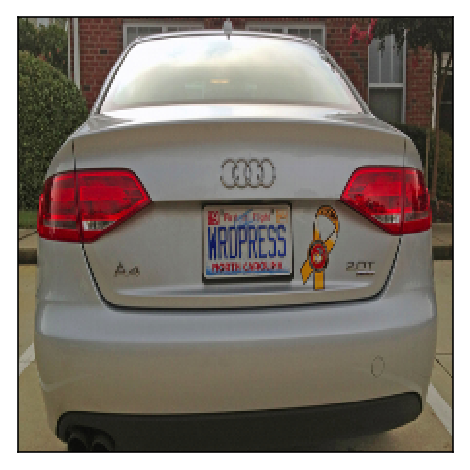

In [166]:
showfig(data[0], None)

1416


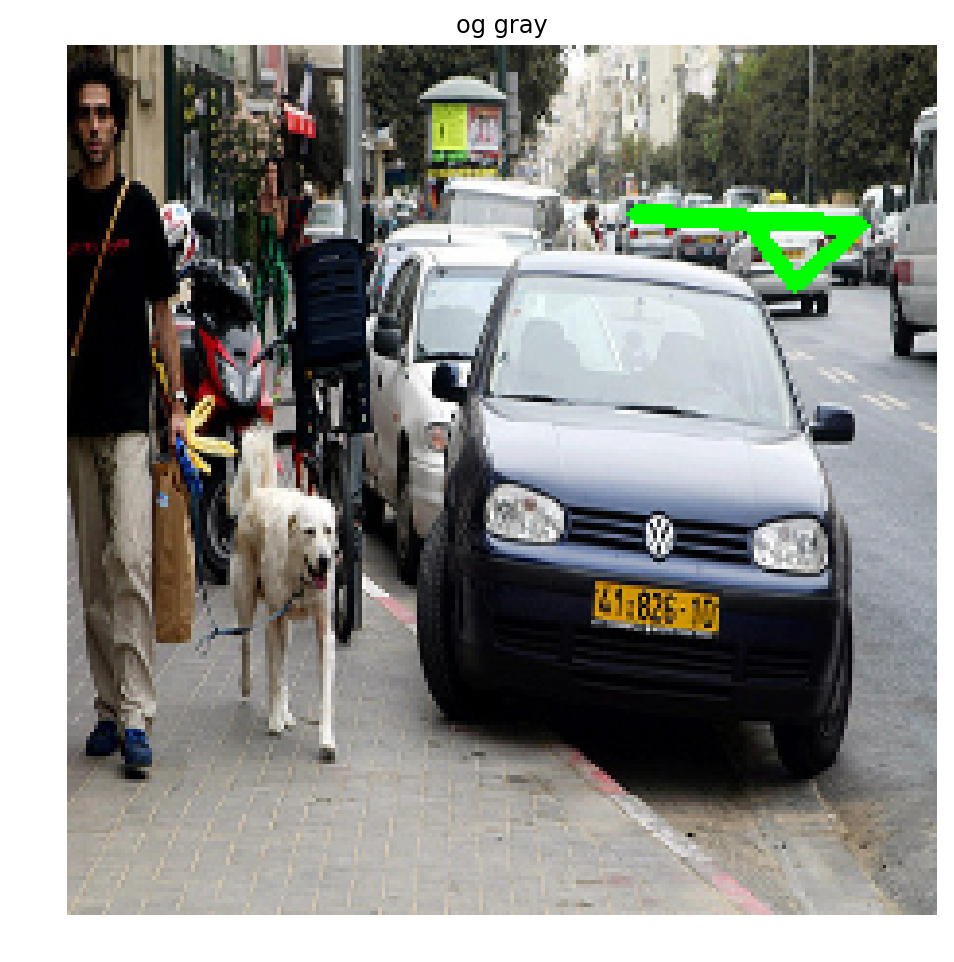

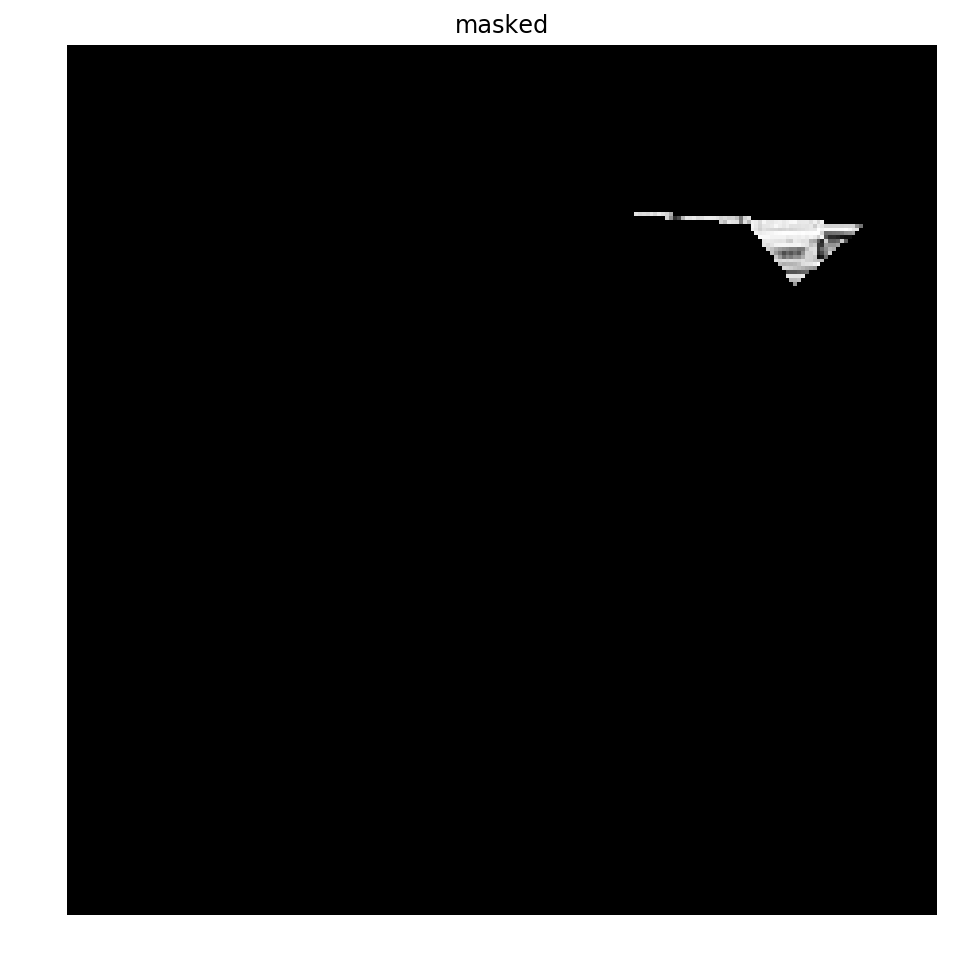

In [170]:
def read_img(filename):
    img_rows, img_cols = 224, 224
    img = cv2.imread(filename,flags = 1)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (img_rows,img_cols))
    return img
p = '../hackathon/car_parking_dataset/12.jpg'
img = read_img(p)
plate = get_plate(img)
#cv2.imwrite('../Desktop/pic/test2.png',plate)

In [172]:
def get_plate(img):
    
    carsample = img.copy()
    img_input = cv2.cvtColor(carsample, cv2.COLOR_BGR2GRAY)
    noise_removal = cv2.bilateralFilter(img_input,9,75,75)
    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=15)
    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    # Thresholding the image
    ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
    canny_image = cv2.Canny(thresh_image,250,255)
    canny_image = cv2.convertScaleAbs(canny_image)
    # dilation to strengthen the edges
    kernel = np.ones((3,3), np.uint8)
    # Creating the kernel for dilation
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
    # Finding Contours in the image based on edges
    
    new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]

    screenCnt = None
    # loop over our contours
    
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        
        aspect_ratio = w/h
        #if aspect_ratio == 2:
        if 2.5 < aspect_ratio < 3.1:
            print(aspect_ratio)
        #rect = cv2.rectangle(img_input,(x,y),(x+w,y+h),(0,255,0),2)
        
        
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)  # Approximating with 6% error
        # if our approximated contour has four points, then
        # we can assume that we have found our screen
        #print(approx)
        if  (1.8 < aspect_ratio < 3) and len(approx) == 4:# and (h*w > 4000 and h*w < 7000):# and (h < 50 and h > 30): # and (rect_area >= 2000 and rect_area <= 15000):  # Select the contour with 4 corners
            screenCnt = approx
            print(w*h)
            break
        else:
            continue
    if screenCnt is None:
        return "plate not found"
    else:
            
            
        final = cv2.drawContours(carsample, [screenCnt], -1, (0, 255, 0), 3)
        mask = np.zeros(img_input.shape,np.uint8)
        new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
        
        
        new_image = cv2.bitwise_and(img_input,img_input,mask=mask)
        final = cv2.drawContours(carsample, [screenCnt], -1, (0, 255, 0), 3)
        
        
        plt.figure(figsize =(8,8))
        plt.axis('off')
        plt.imshow(carsample)
        plt.title("og gray")
        
        plt.figure(figsize = (8,8))
        
        mask = np.zeros(img_input.shape,np.uint8)
        new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
        new_image = cv2.bitwise_and(img_input,img_input,mask=mask)
        plt.axis('off')
        plt.imshow(new_image, cmap = "gray")
        plt.title("masked")


18430
5123
2.927536231884058
3.0
2343
2.6315789473684212
2.823529411764706
2.875
736
2400
3.0535714285714284
903
1856
1416
24416
2.6987951807228914
2.875
184
26656


/Users/Stav/anaconda2/envs/deeplearning/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


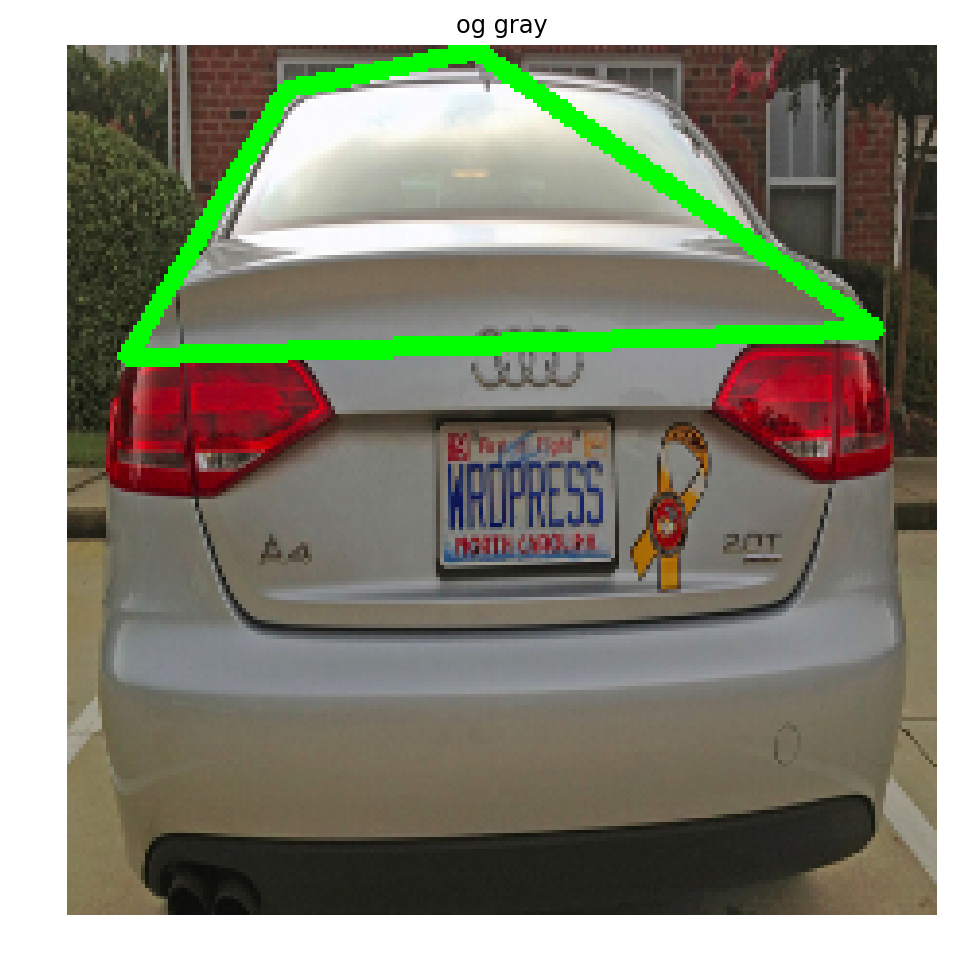

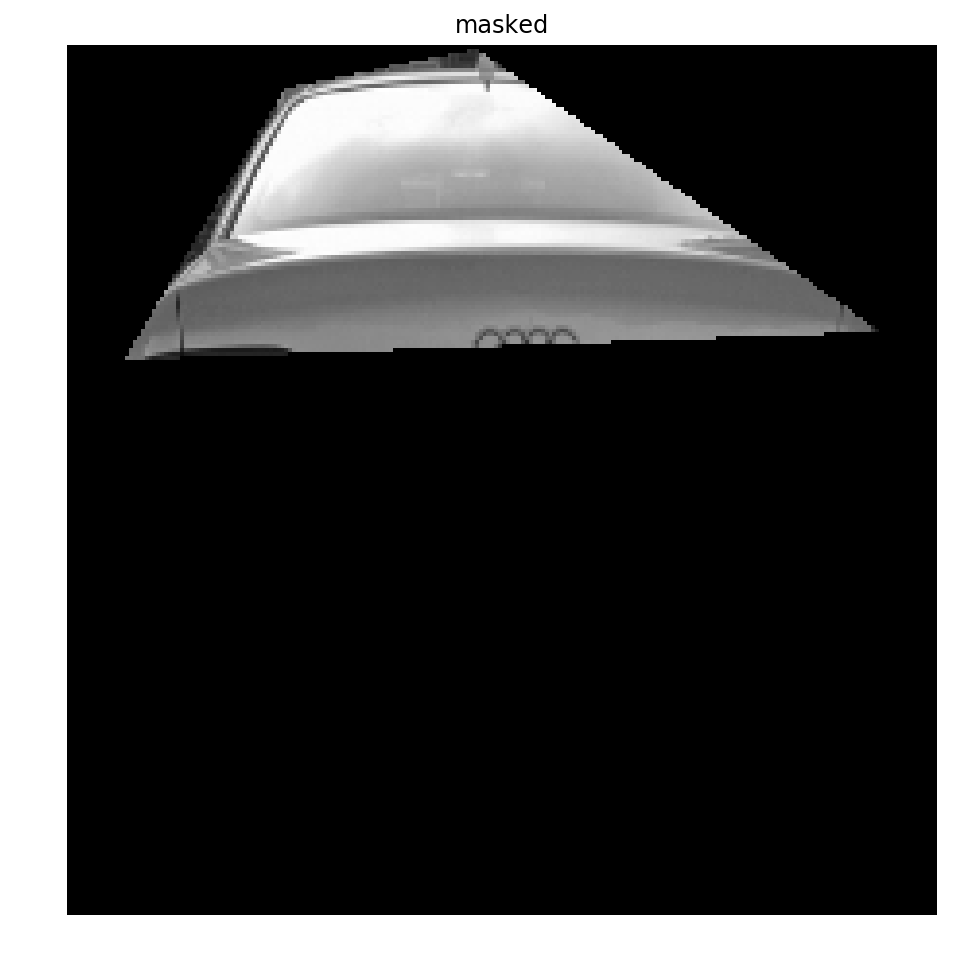

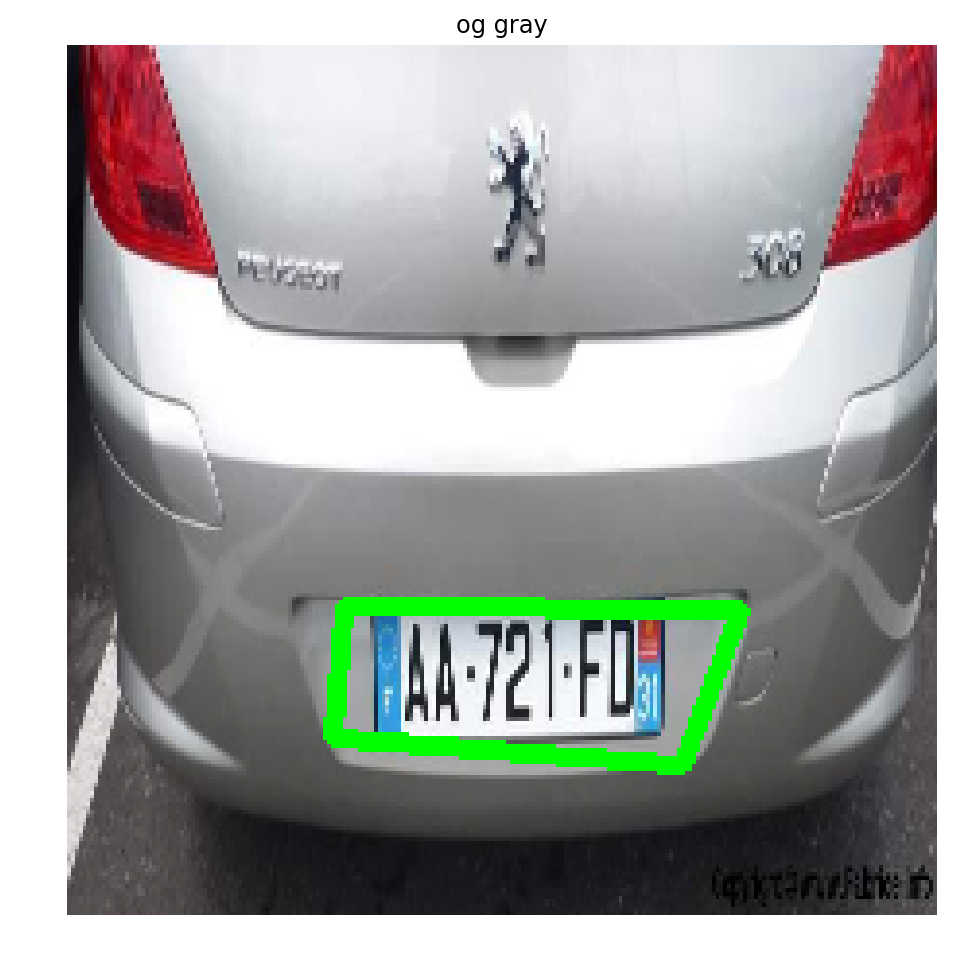

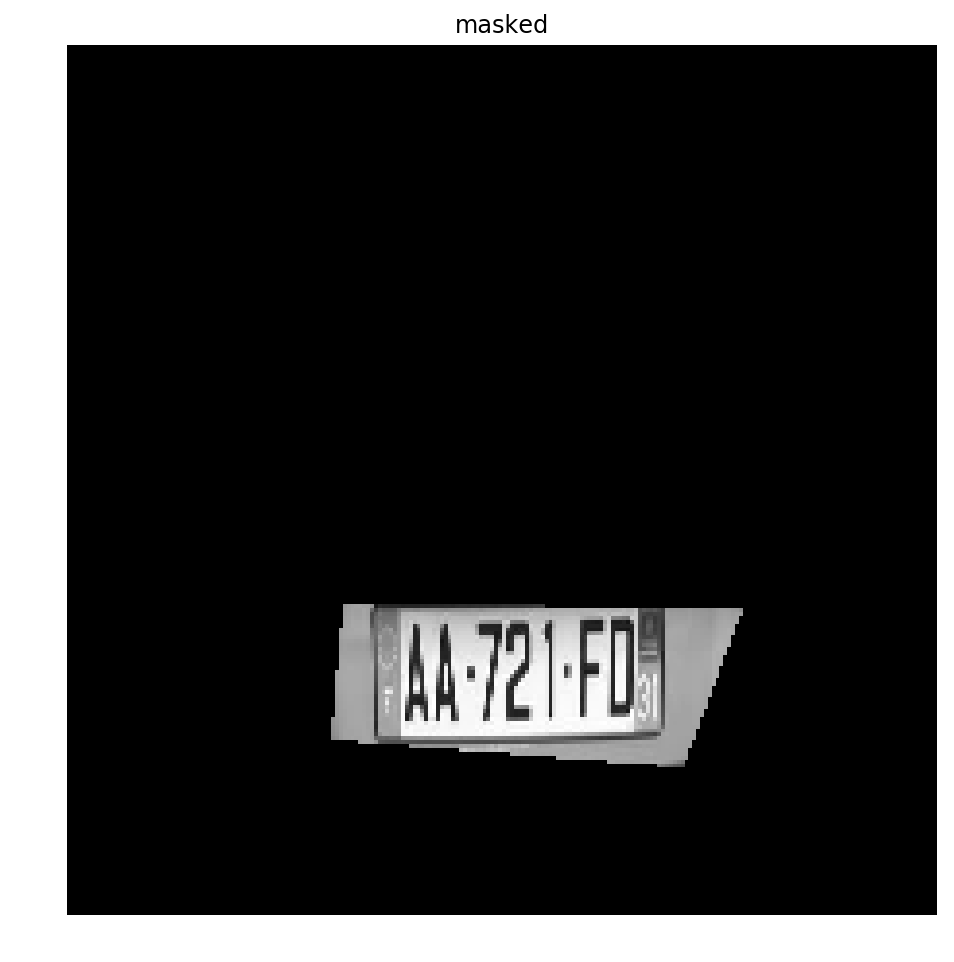

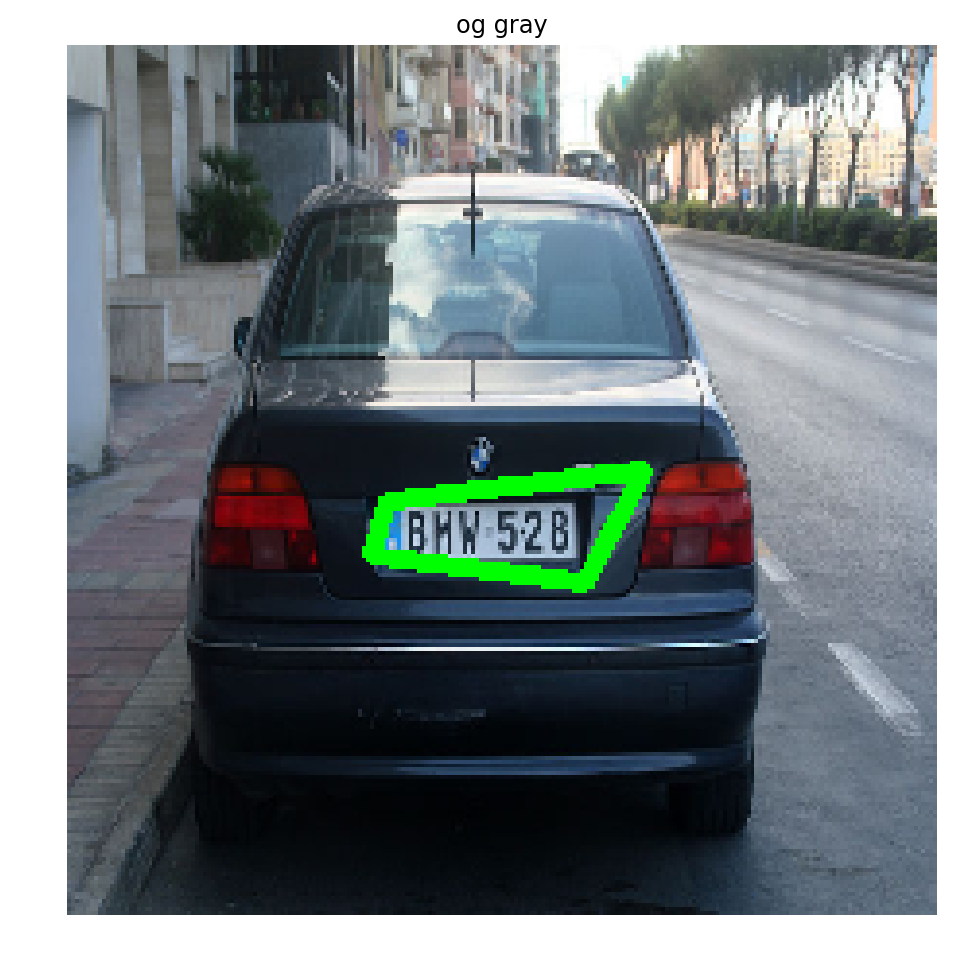

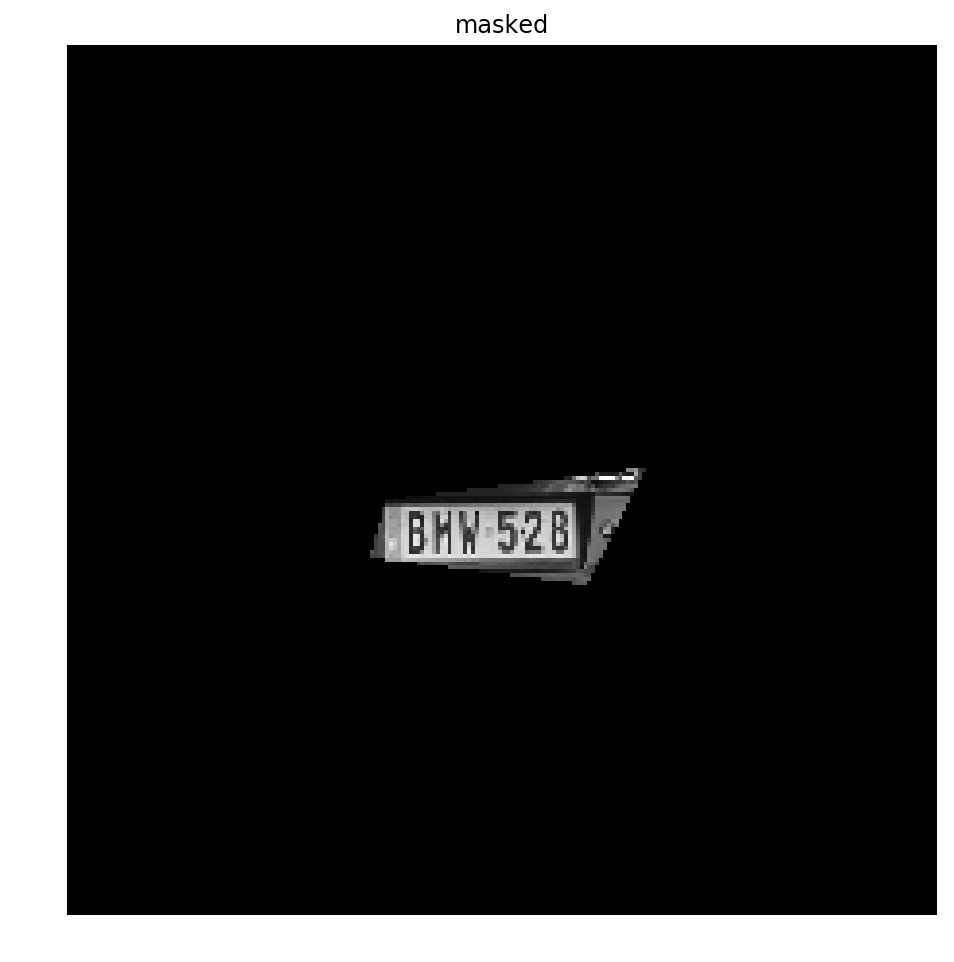

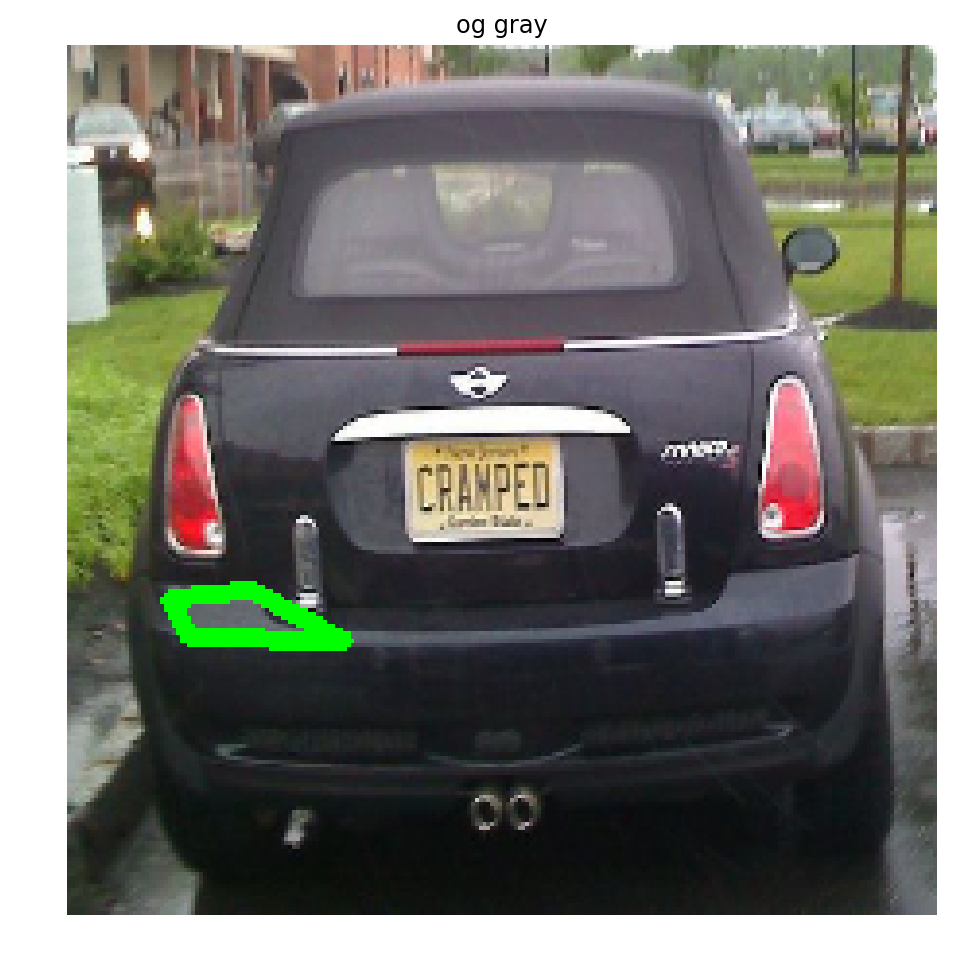

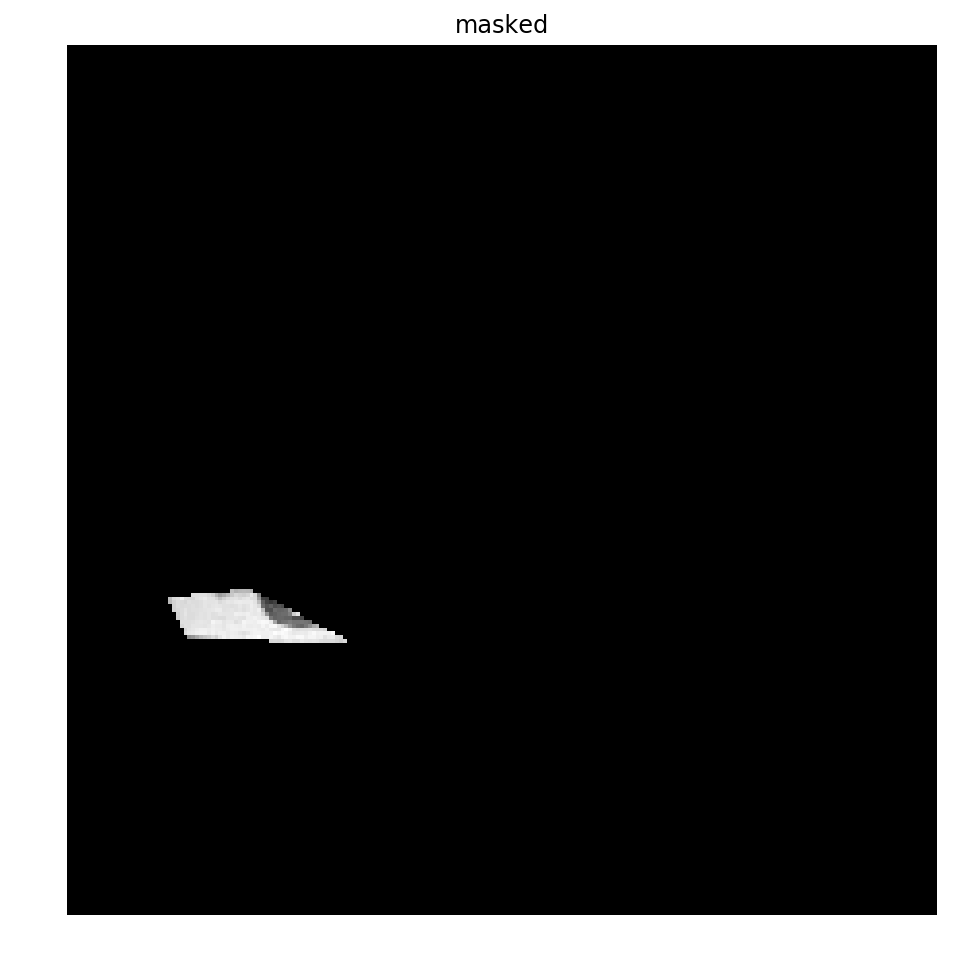

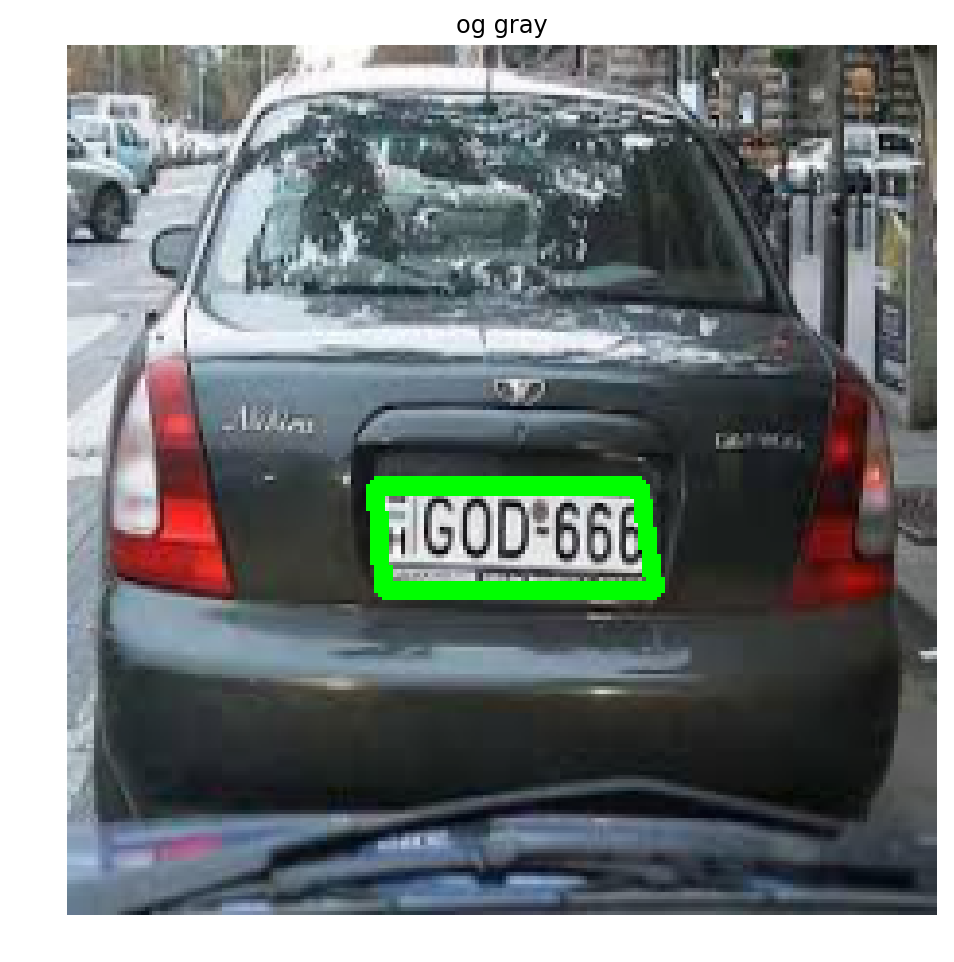

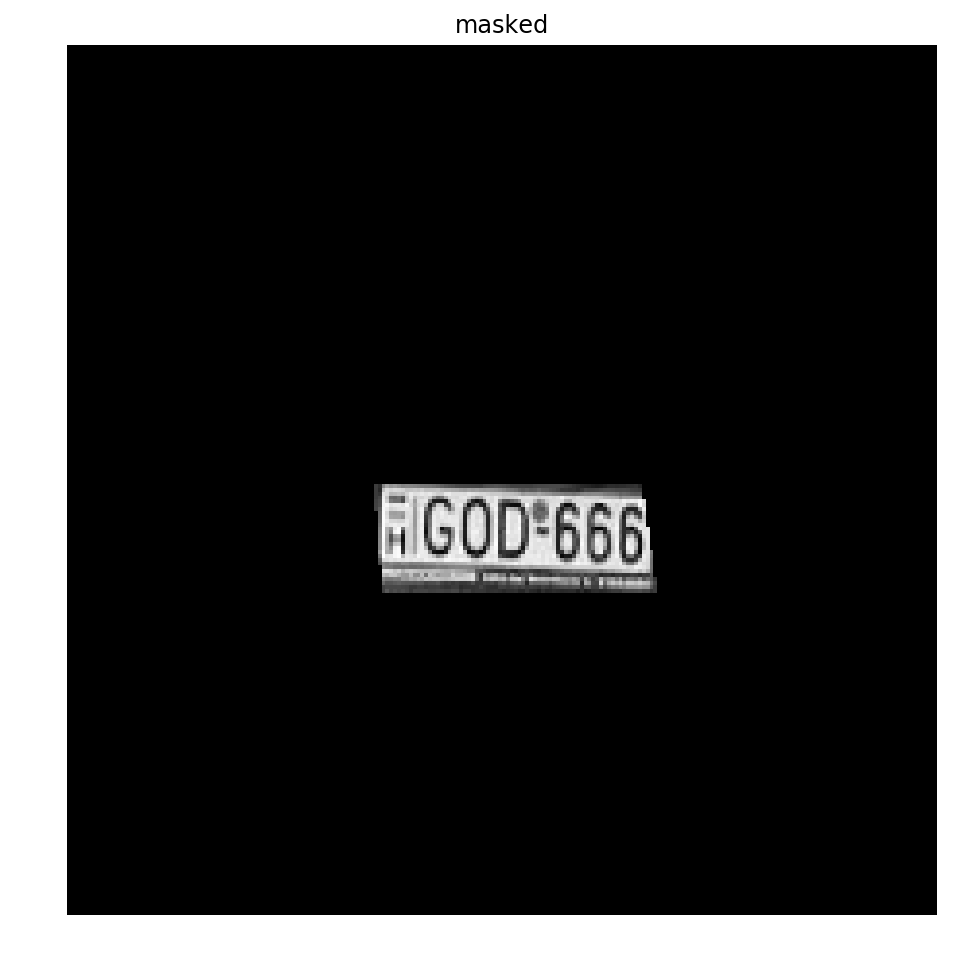

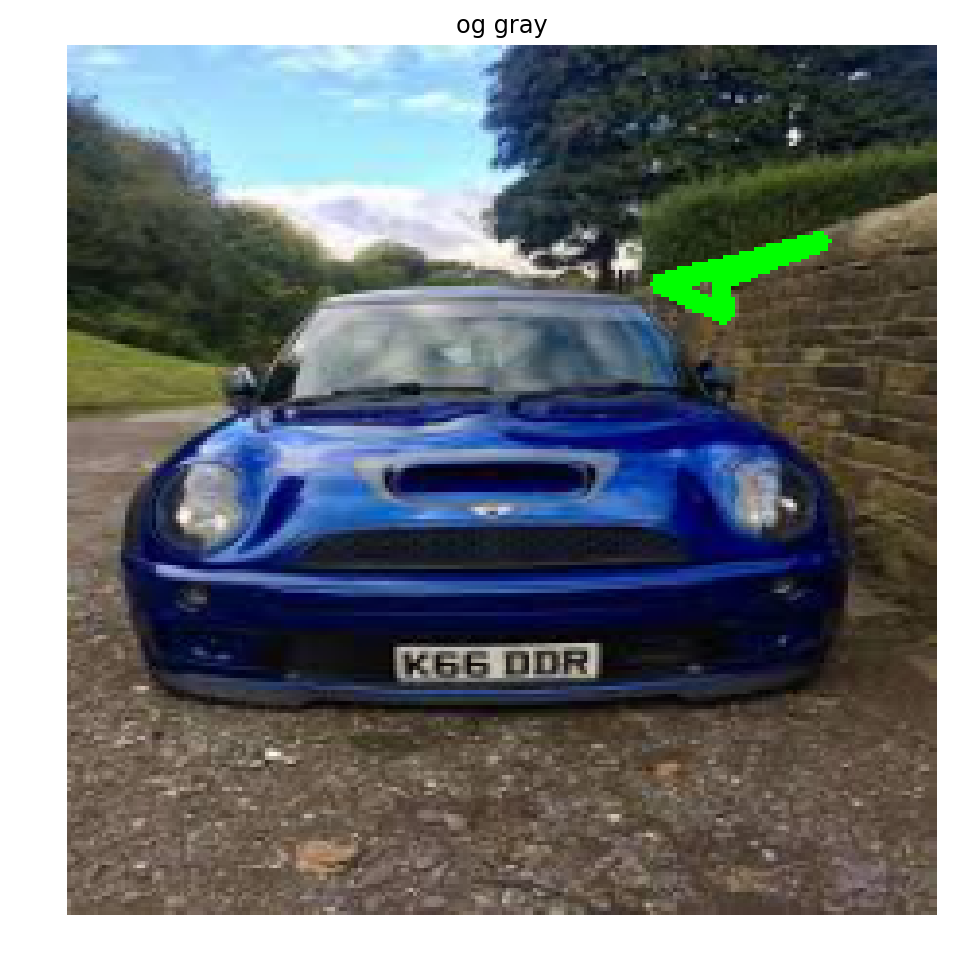

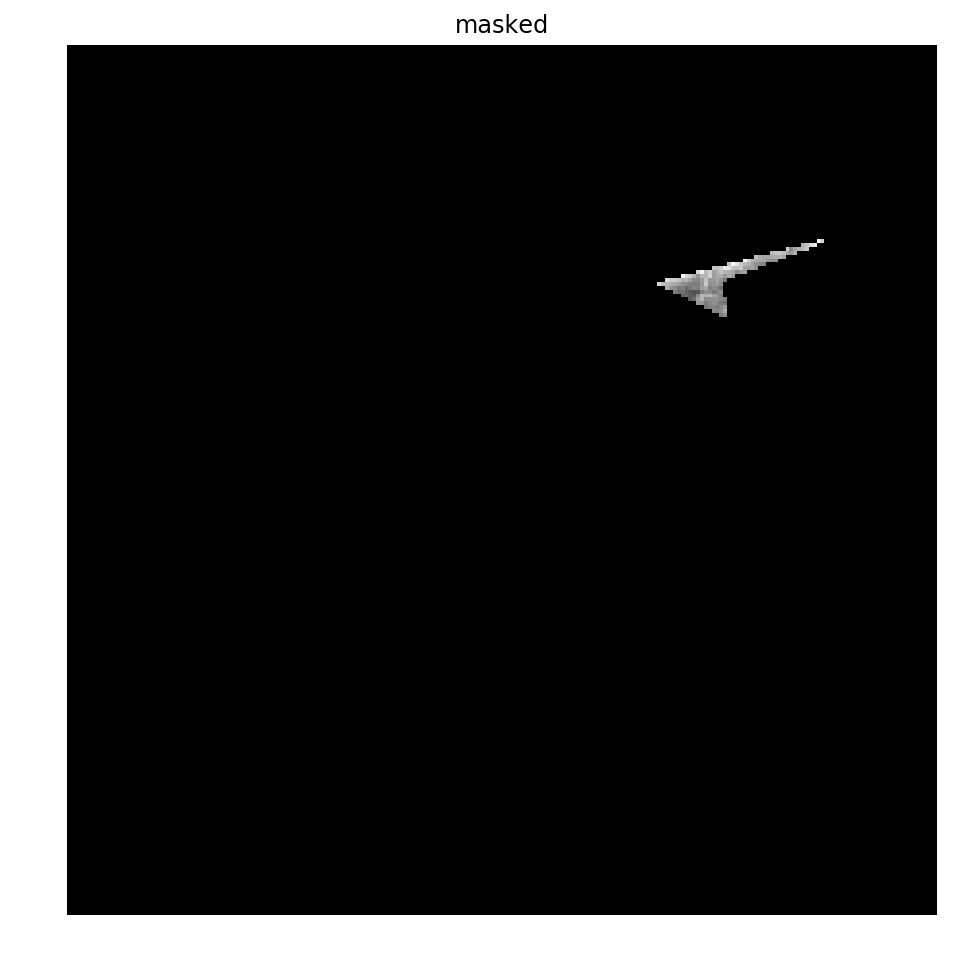

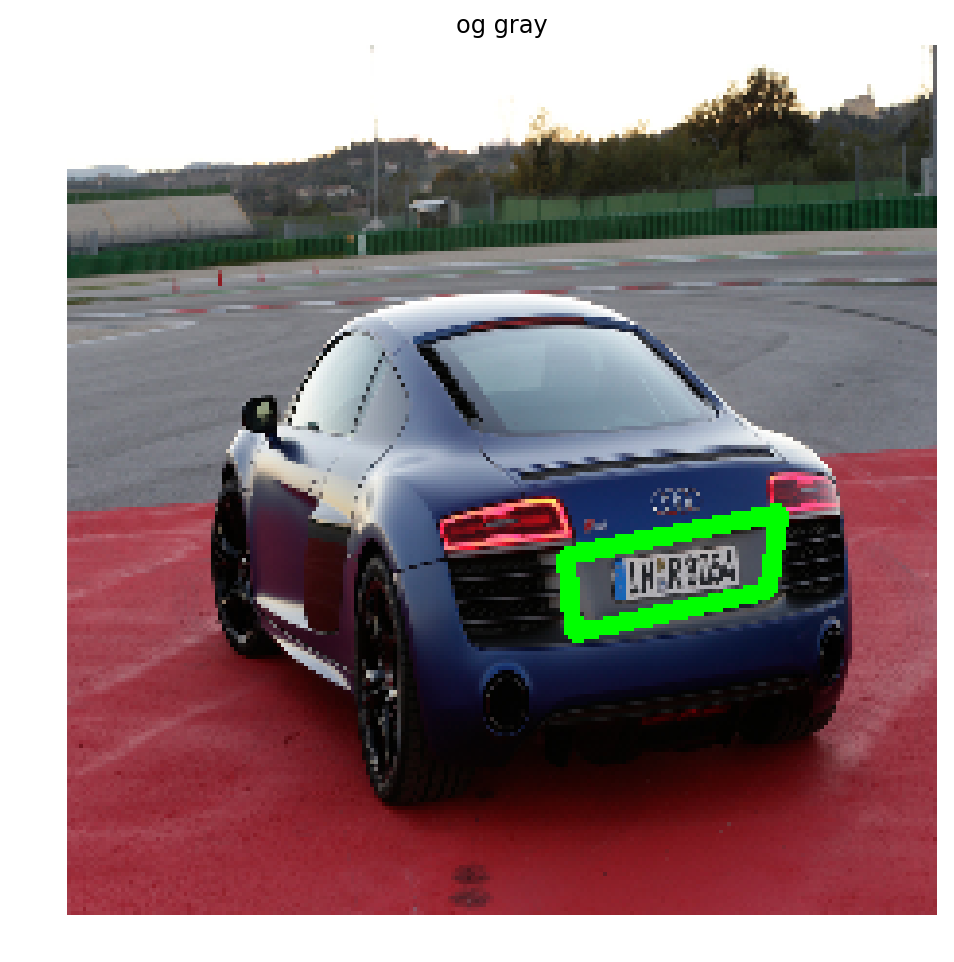

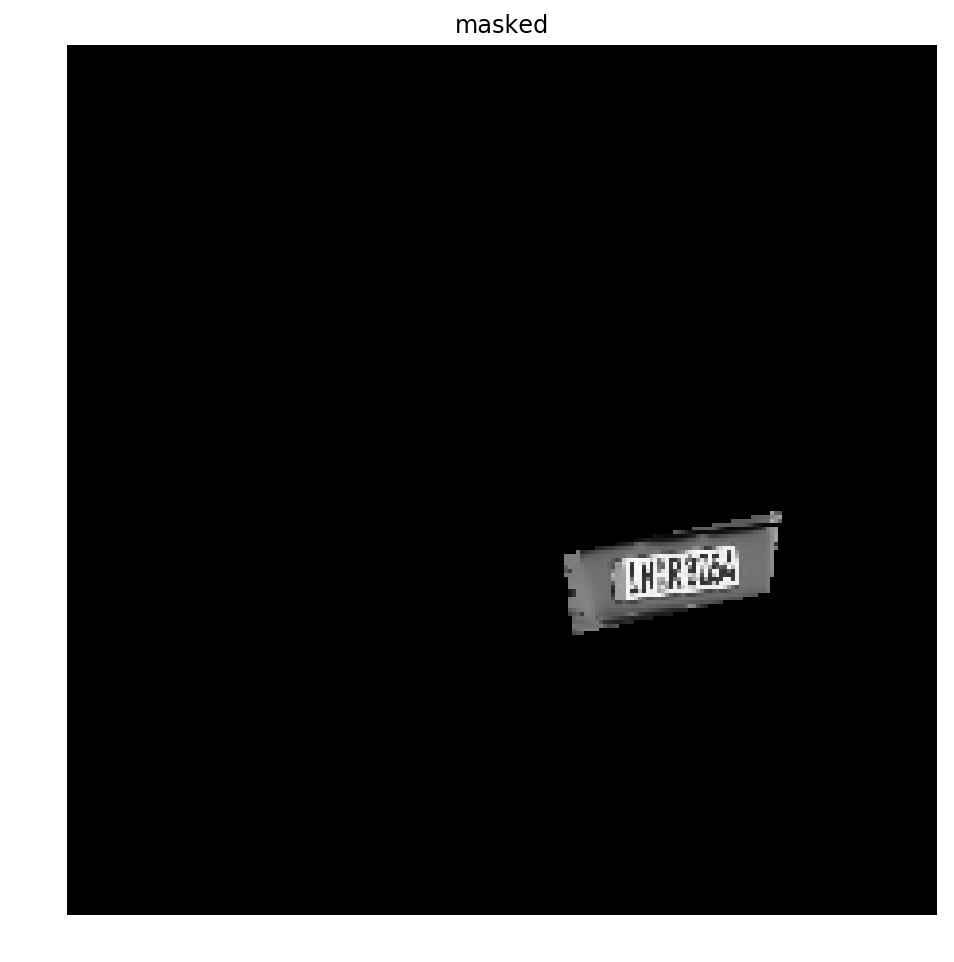

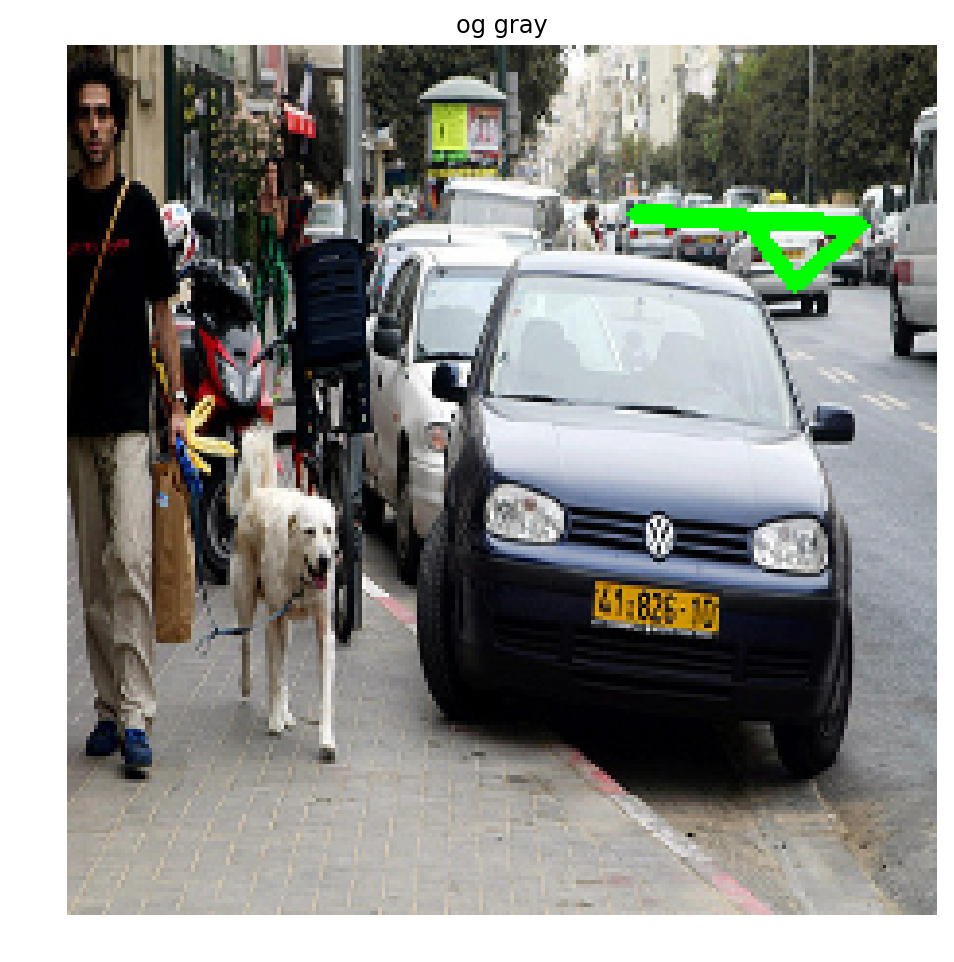

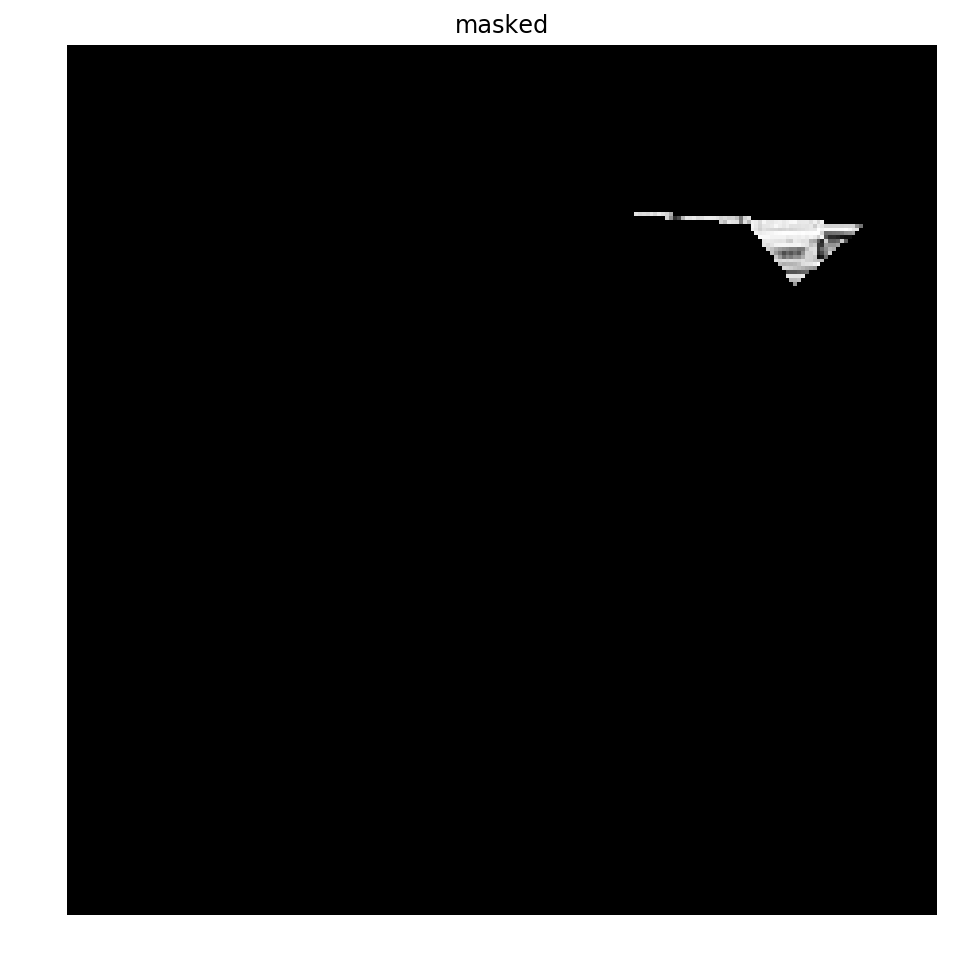

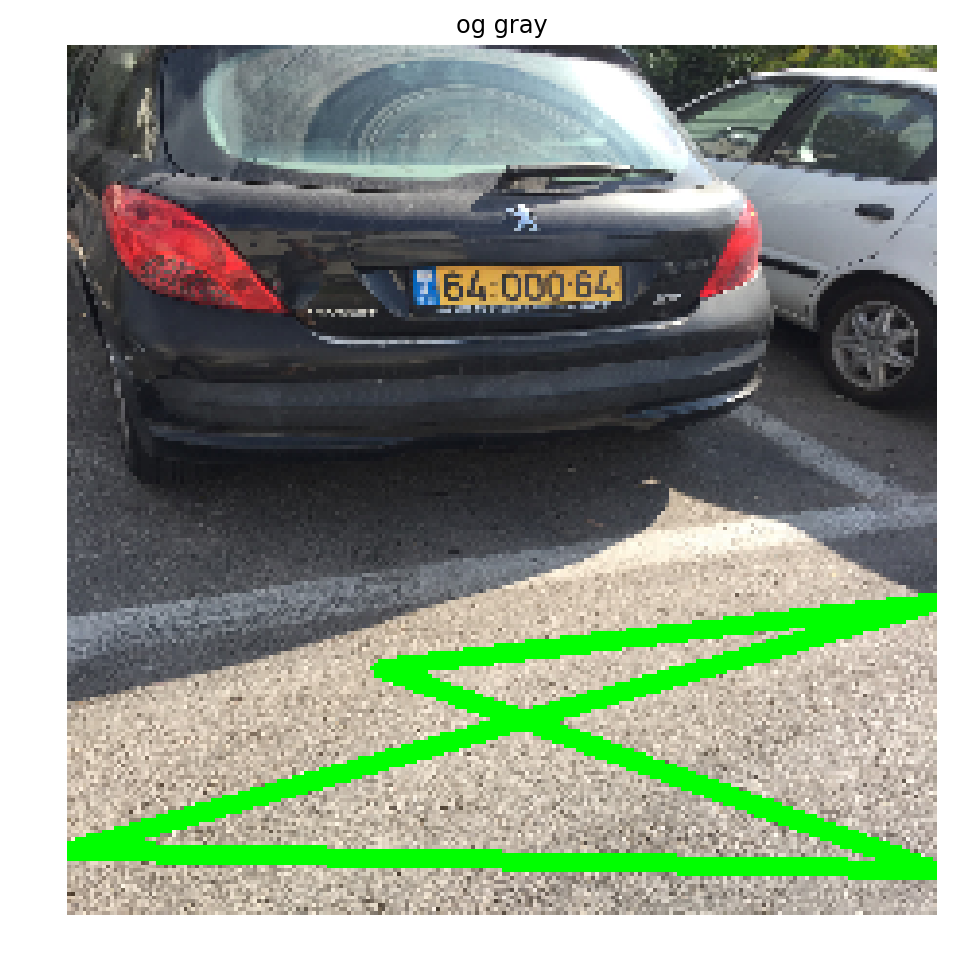

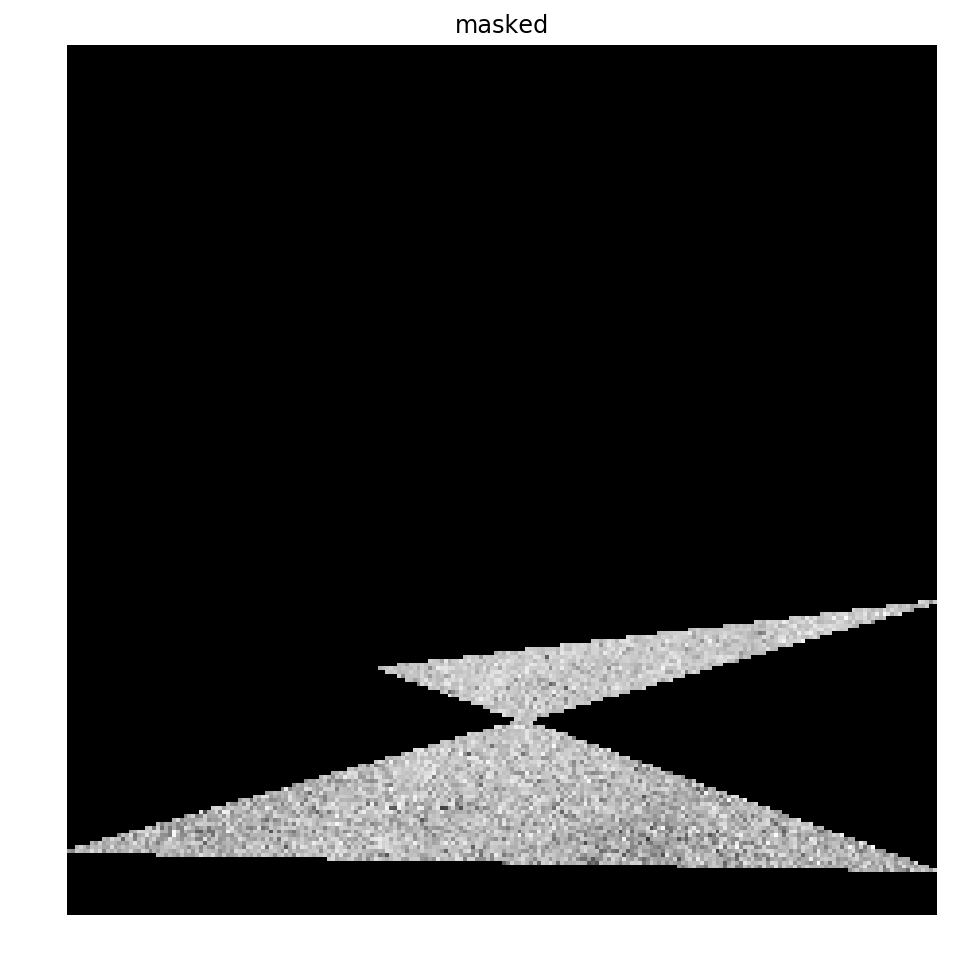

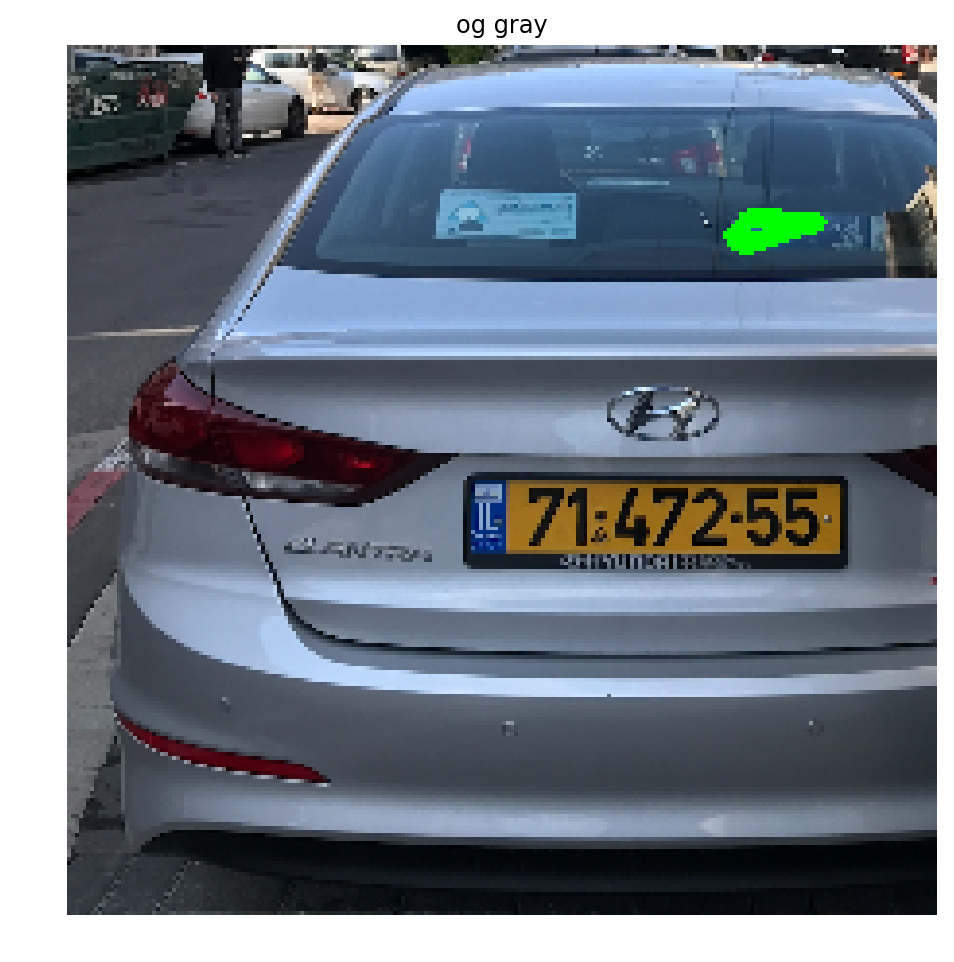

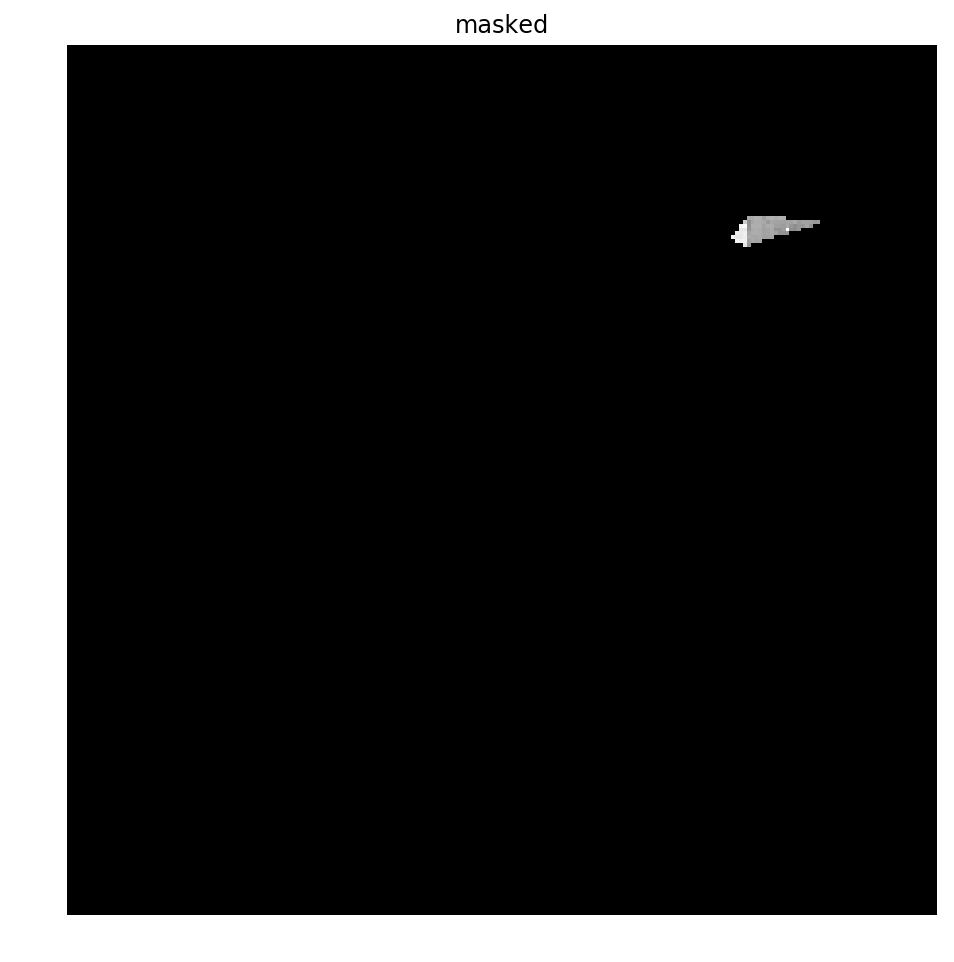

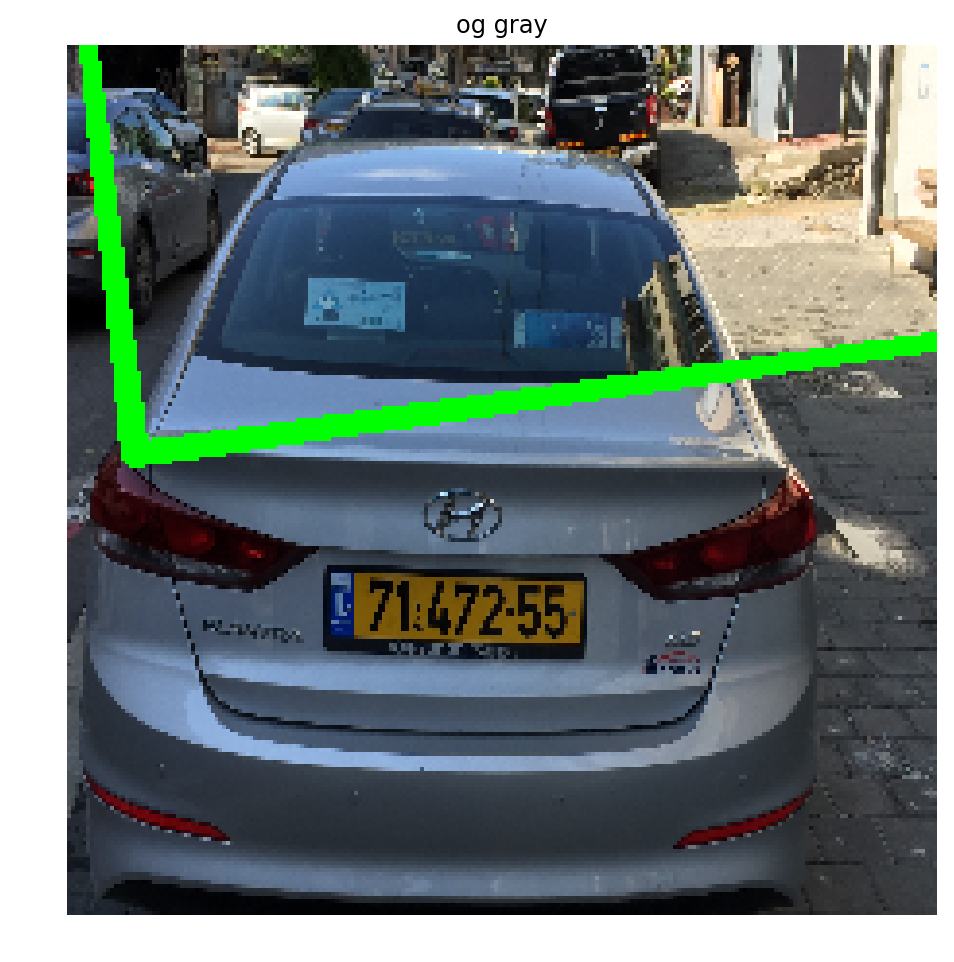

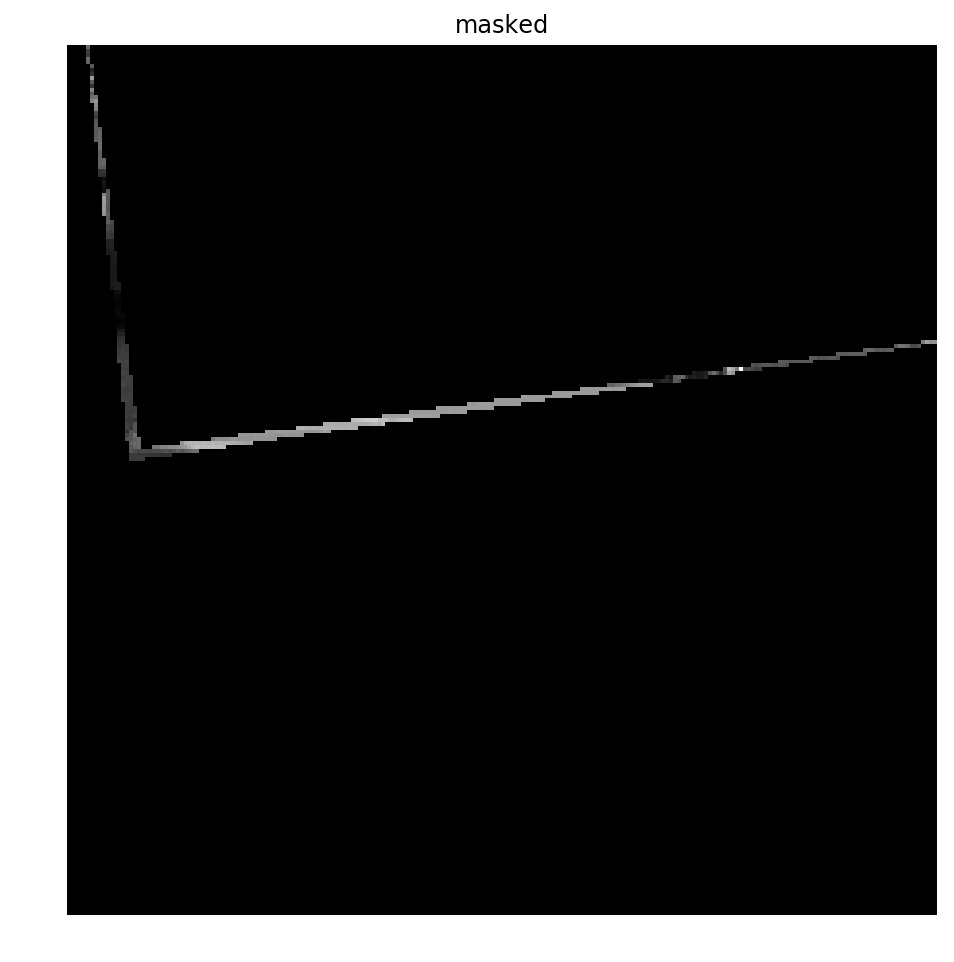

In [173]:
#for i in range(len(data)):
for i in range(0,1000):
    my_plate = get_plate(data[i])